In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [3]:
print("{} train samples and {} test samples \n".format(len(x_train), len(x_test)))
print("train samples shape:", x_train.shape)
print("train labels shape:", y_train.shape)

50000 train samples and 10000 test samples 

train samples shape: (50000, 32, 32, 3)
train labels shape: (50000, 1)


In [4]:
class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

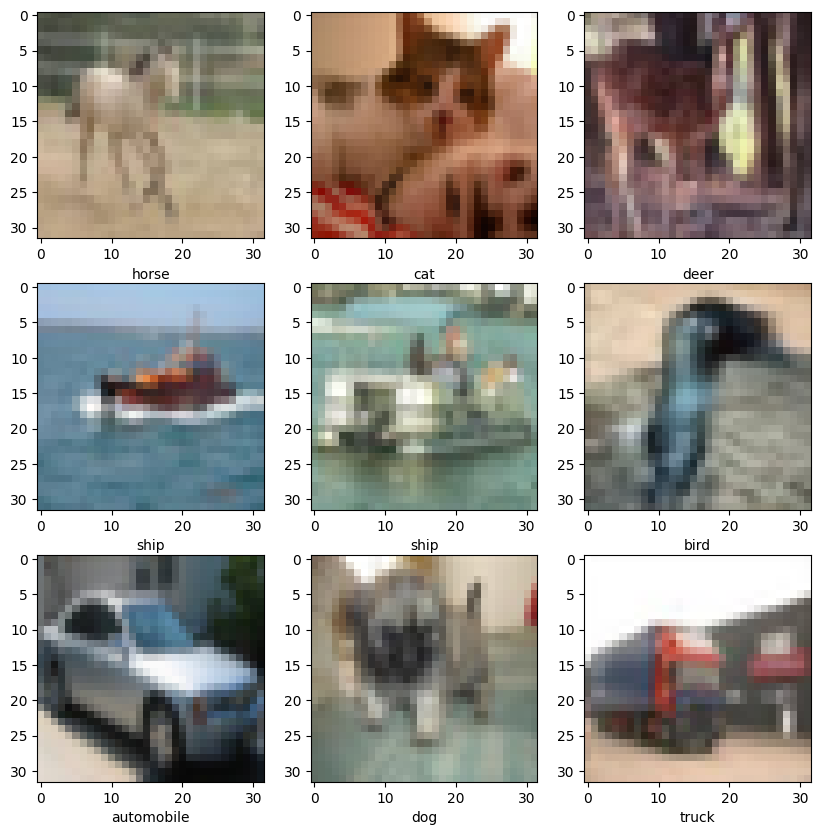

In [5]:
idx = np.random.randint(len(x_train) - 9)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i+idx])
    plt.xlabel(class_names[(y_train[i+idx][0])])

plt.show()

## Data Reduction

#### Sample Reduction

In [6]:
#Current samples vaues
print(x_train[0][0][0])

[59 62 63]


In [7]:
# Sample Normalization
# Normalization where the relationship between the values remains the same, but they are reduced to a smaller scale.
x_train =x_train / 255
x_test = x_test / 255

In [8]:
#updated sample values
print(x_train[0][0][0])

[0.23137255 0.24313725 0.24705882]


#### Label Reduction


In [9]:
#currently, our label stores an integer value that represents a certain class
print("class {} represents a {}".format(y_train[0][0], class_names[y_train[0][0]]))



class 6 represents a frog


One Hot encoding

Where we convert decimal values to their binary representation

In [10]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print("class {} represents a {}".format(y_train[0], class_names[np.argmax(y_train[0])]))


class [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] represents a frog


In [21]:
from tensorflow.keras import Sequential, layers

def build_model():
    model = Sequential()
    model.add(layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(128, 3, activation='relu', padding='same'))  # Increased number of filters
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(256, 3, activation='relu', padding='same'))  # Additional convolutional layer
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))  # Increased number of neurons
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer ='adam',
        loss = 'categorical_crossentropy',
        metrics =['accuracy'])
    return model

model = build_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 8, 8, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 4, 4, 256)        

In [22]:
%%time
history = model.fit(x_train, y_train, epochs=10)
model.save('baseline.keras')

print("\ninitial accuracy: {} | latest accuracy: {}".format(history.history["accuracy"][0], history.history["accuracy"][-1]))
print("initial loss: {} | latest loss: {}".format(history.history["loss"][0], history.history["loss"][-1]))


Epoch 1/10
1563/1563 [==============================] - 321s 204ms/step - loss: 1.3166 - accuracy: 0.5235
Epoch 2/10
1563/1563 [==============================] - 301s 192ms/step - loss: 0.8739 - accuracy: 0.6933
Epoch 3/10
1563/1563 [==============================] - 297s 190ms/step - loss: 0.6915 - accuracy: 0.7575
Epoch 4/10
1563/1563 [==============================] - 298s 191ms/step - loss: 0.5506 - accuracy: 0.8076
Epoch 5/10
1563/1563 [==============================] - 298s 191ms/step - loss: 0.4308 - accuracy: 0.8476
Epoch 6/10
1563/1563 [==============================] - 302s 193ms/step - loss: 0.3240 - accuracy: 0.8850
Epoch 7/10
1563/1563 [==============================] - 296s 189ms/step - loss: 0.2384 - accuracy: 0.9156
Epoch 8/10
1563/1563 [==============================] - 292s 187ms/step - loss: 0.1798 - accuracy: 0.9363
Epoch 9/10
1563/1563 [==============================] - 286s 183ms/step - loss: 0.1481 - accuracy: 0.9475
Epoch 10/10
1563/1563 [=======================

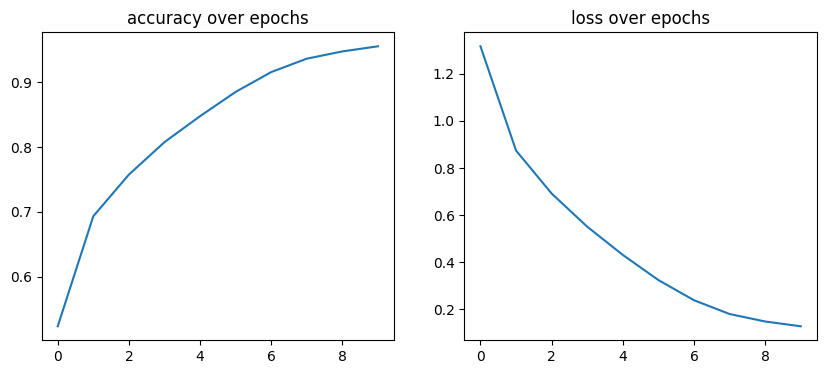

In [23]:
fig, axis = plt.subplots(1, 2, figsize=(10,4))  
axis[0].plot(history.history["accuracy"])
axis[0].set_title("accuracy over epochs")
axis[1].plot(history.history["loss"])
axis[1].set_title("loss over epochs")
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\ntest accuracy score:', test_acc)

313/313 - 12s - loss: 1.2504 - accuracy: 0.7563 - 12s/epoch - 37ms/step

test accuracy score: 0.7562999725341797


In [25]:
predictions = model.predict(x_test)


313/313 [==============================] - 12s 39ms/step


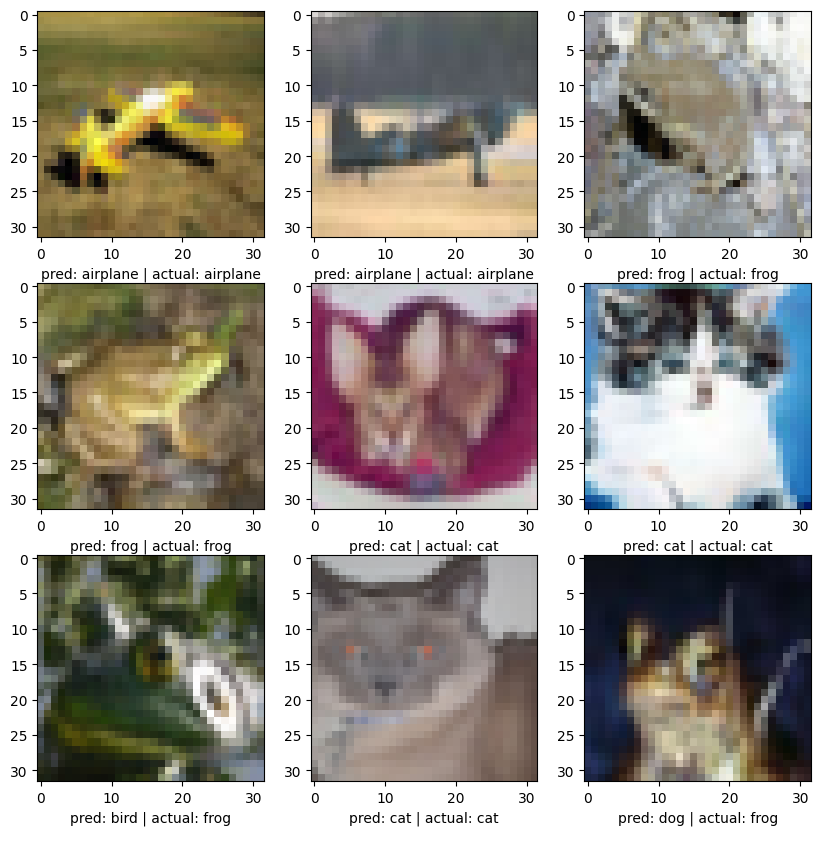

In [26]:
# select a random set of 9 test images
idx = np.random.randint(len(x_test) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each test image along with its prediction
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_test[i + idx]) 
    plt.xlabel("pred: {} | actual: {}\n".format(class_names[np.argmax(predictions[i + idx])], class_names[np.argmax(y_test[i + idx])]))

# display results
plt.show()